In [1]:
!pip install mtcnn
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from glob import glob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.0 MB/s eta 0:00:00


In [3]:
def return_boxes(filename, result_list,data):
    for result in result_list:
        x, y, width, height = result['box']
        height = height/2
        eye1 = Rectangle((x, y), width/2, height, fill=False, color='red')
        eye2 = Rectangle(((x+(width/2)), y), width/2, height, fill=False, color='red')
        return (eye1,eye2)
    

In [13]:
def draw_image(filename, result_list):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    for result in result_list:
             x, y, width, height = result['box']
             height = height/2
             eye1 = Rectangle((x, y), width/2, height, fill=False, color='red')
             eye2 = Rectangle(((x+(width/2)), y), width/2, height, fill=False, color='red')
             ax.add_patch(eye1)
             ax.add_patch(eye2)
             pyplot.show()

In [5]:
filename = glob("/content/*")
for i in filename:
    if i[-3:] != 'jpg':
        filename.remove(i)

In [6]:
filename

['/content/no_2.jpg',
 '/content/no_4.jpg',
 '/content/yawn_2.jpg',
 '/content/yawn_4.jpg',
 '/content/no_3.jpg',
 '/content/yawn_1.jpg',
 '/content/no_1.jpg',
 '/content/yawn_3.jpg']

1/1 [==============================] - 0s 267ms/step


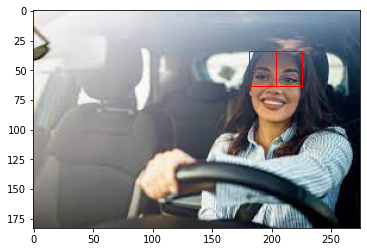

1/1 [==============================] - 0s 164ms/step


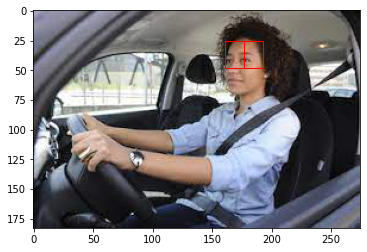

1/1 [==============================] - 0s 164ms/step


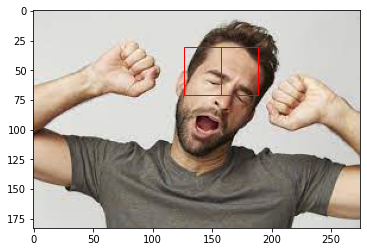

1/1 [==============================] - 0s 163ms/step


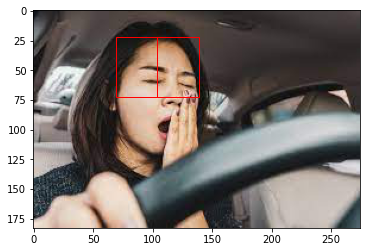

1/1 [==============================] - 0s 175ms/step


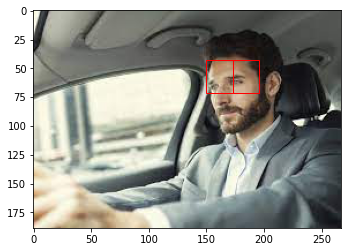

1/1 [==============================] - 0s 179ms/step


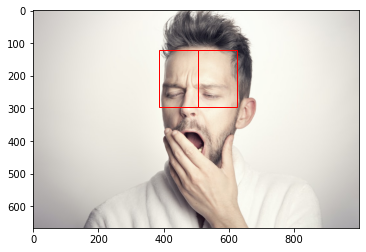

1/1 [==============================] - 0s 259ms/step


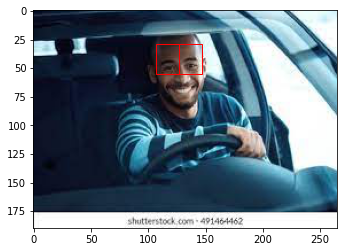

1/1 [==============================] - 0s 262ms/step


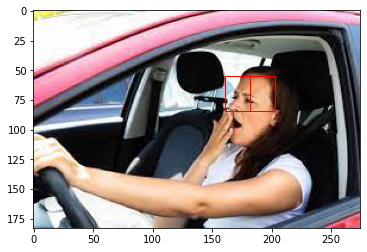

In [14]:
for i in filename:
    pixels = pyplot.imread(i)
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    draw_image(i, faces)

1/1 [==============================] - 0s 252ms/step


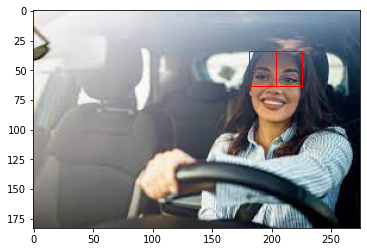

In [16]:
pixels = pyplot.imread("/content/no_2.jpg")
detector = MTCNN()
faces = detector.detect_faces(pixels)
data = draw_image("/content/no_2.jpg",faces)


In [8]:
def extract_eye(img):
    image = pyplot.imread(img)
    img = return_boxes(img,detector.detect_faces(image),image)
    left = img[0]
    x = int(left.xy[0])
    y = int(left.xy[1])
    xw = int(left.xy[0]+left._width)
    yh = int(left.xy[1]+left._height)
    l_eye = image[y:yh,x:xw]

    right = img[1]
    x = int(right.xy[0])
    y = int(right.xy[1])
    xw = int(right.xy[0]+right._width)
    yh = int(right.xy[1]+right._height)
    r_eye = image[y:yh,x:xw]

    f,ax = pyplot.subplots(1,3)

    
    ax[0].imshow(l_eye)
    ax[1].imshow(r_eye)
    ax[0].set_title("Left Eye")
    ax[1].set_title("Right Eye")
    ax[0].axis("off")
    ax[1].axis("off")

    
    pyplot.imshow(image)
    pyplot.title("Original Image")
    pyplot.axis("off")
    pyplot.show()



1/1 [==============================] - 0s 38ms/step


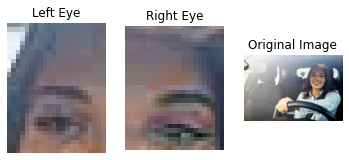

In [9]:
extract_eye("/content/no_2.jpg")

1/1 [==============================] - 0s 39ms/step


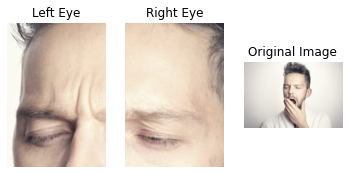

In [10]:
extract_eye("/content/yawn_1.jpg")

1/1 [==============================] - 0s 352ms/step


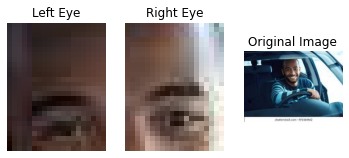

In [11]:
extract_eye("/content/no_1.jpg")

1/1 [==============================] - 0s 58ms/step


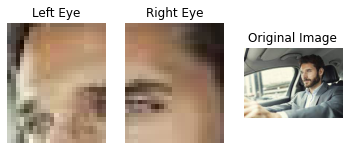

In [12]:
extract_eye("/content/no_3.jpg")